In [2]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd, gzip, math, scipy.optimize
from sklearn.linear_model import LinearRegression
from sklearn. metrics import r2_score, mean_squared_error, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import tensorflow as tf

### Loading Data from JSON (DO NOT RUN)

Note: Do NOT run this section as this section is how we produced "raw_data.csv". The csv can directly be downloaded from Google Drive as we have difficulties uploading large files.

In [2]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)
        
def readJSON(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        d = eval(l)
        if 'review/overall' not in l:
            continue
        br_id, ABV, style = d['beer/beerId'], d['beer/ABV'], d['beer/style']
        aprs, aroma, palate, taste = float(d['review/appearance'].split('/')[0]), float(d['review/aroma'].split('/')[0]), float(d['review/palate'].split('/')[0]), float(d['review/taste'].split('/')[0])
        rating = float(d['review/overall'].split('/')[0])
        yield br_id, ABV, style, aprs, aroma, palate, taste, rating
        

dataset = []
for l in readJSON("ratebeer.json.gz"):
        dataset.append(l)
        
print(dataset[0])
df = pd.DataFrame(dataset)
df.columns = ["Beer ID", "ABV","Style","Apperance","Aroma","Palate","Taste","Overall"]
df.head()

('63836', '5.4', 'India Pale Ale &#40;IPA&#41;', 4.0, 6.0, 4.0, 7.0, 13.0)


,Beer ID,ABV,Style,Apperance,Aroma,Palate,Taste,Overall
0,63836,5.4,India Pale Ale &#40;IPA&#41;,4.0,6.0,4.0,7.0,13.0
1,71716,5,Bohemian Pilsener,4.0,5.0,3.0,6.0,14.0
2,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
3,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
4,31544,-,Sweet Stout,5.0,8.0,4.0,7.0,16.0


In [3]:
df.shape

(2924162, 8)

In [4]:
# save data
df.to_csv('raw_data.csv', index = False)

### Data Preprocessing and Exploration (Start run from here)

In [4]:
df = pd.read_csv('raw_data.csv')

C:\Users\Tony Han\AppData\Local\Temp\ipykernel_18920\2797298529.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_data.csv')


In [5]:
df_num = df.drop(columns = ["Style", "Beer ID"])
df_num = df_num.apply(pd.to_numeric, errors = 'coerce')

In [6]:
df_num = df_num.dropna()
df_num.shape

(2785525, 6)

In [7]:
df_num.to_csv('cleaned_numeric_data.csv', index = False)

### Further Exploration and Linear Regression

In [8]:
df_num = pd.read_csv("./cleaned_numeric_data.csv")
df_num

,ABV,Apperance,Aroma,Palate,Taste,Overall
0,5.4,4.0,6.0,4.0,7.0,13.0
1,5.0,4.0,5.0,3.0,6.0,14.0
2,5.4,2.0,4.0,2.0,4.0,8.0
3,5.4,2.0,4.0,2.0,4.0,8.0
4,7.0,2.0,6.0,3.0,7.0,14.0
...,...,...,...,...,...,...
2785520,6.3,3.0,7.0,3.0,7.0,15.0
2785521,5.0,4.0,5.0,3.0,6.0,12.0
2785522,5.0,4.0,4.0,3.0,6.0,13.0
2785523,5.0,3.0,5.0,2.0,5.0,10.0


In [9]:
df_num.describe()

,ABV,Apperance,Aroma,Palate,Taste,Overall
count,2.785525e+06,2.785525e+06,2.785525e+06,2.785525e+06,2.785525e+06,2.785525e+06
mean,6.640795e+00,3.437981e+00,6.367715e+00,3.264692e+00,6.467844e+00,1.323528e+01
std,2.313753e+00,8.139246e-01,1.642226e+00,8.306155e-01,1.623695e+00,3.353437e+00
min,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.000000e+00,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01
50%,6.000000e+00,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01
75%,8.000000e+00,4.000000e+00,7.000000e+00,4.000000e+00,8.000000e+00,1.600000e+01
max,5.770000e+01,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01


In [10]:
sns.pairplot(df_num)

Error in callback <function _draw_all_if_interactive at 0x0000011753D79A20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Axes: >

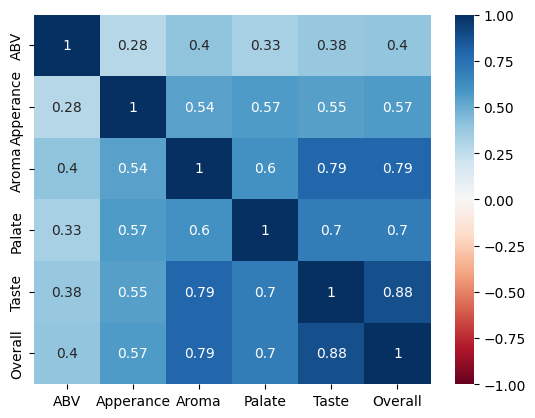

In [ ]:
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, center = 0, annot= True, cmap = 'RdBu')

In [ ]:
scaler = MinMaxScaler()
cols = df_num.columns
df_num = scaler.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns = cols)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_num.drop(['Overall'], axis=1), df_num.Overall, test_size=0.2, random_state=10)
model = LinearRegression()
linear_model = model.fit(X_train, y_train)
print(model.coef_)
yhat_train_lin = model.predict(X_train)
yhat_test_lin = model.predict(X_test)
print(f"MSE for train: {mean_squared_error(y_train, yhat_train_lin)}")
print(f"MSE for test: {mean_squared_error(y_test, yhat_test_lin)}")

[0.14969749 0.04763279 0.20383134 0.11303838 0.56100159]
MSE for train: 0.006022320423888641
MSE for test: 0.0060513246434869125


In [ ]:
X_train

,ABV,Apperance,Aroma,Palate,Taste
19220,0.098631,0.75,0.666667,0.50,0.777778
129440,0.077830,0.50,0.555556,0.50,0.333333
1046238,0.099497,0.50,0.777778,0.50,0.666667
1514221,0.114231,0.50,0.666667,0.75,0.777778
145451,0.100364,0.75,0.666667,0.50,0.555556
...,...,...,...,...,...
1348317,0.093430,0.25,0.555556,0.50,0.555556
1976281,0.199168,1.00,0.777778,1.00,0.888889
2714993,0.098631,0.50,0.555556,0.50,0.333333
1929743,0.102097,0.50,0.444444,0.75,0.666667


In [ ]:
y_train

19220      0.736842
129440     0.473684
1046238    0.631579
1514221    0.789474
145451     0.684211
             ...   
1348317    0.631579
1976281    0.947368
2714993    0.578947
1929743    0.526316
1048548    0.578947
Name: Overall, Length: 2228420, dtype: float64

### Deep Learning prediction of overall rating using other numeric features

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=1,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model = Sequential()


model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))


model.add(Dense(32, activation='relu'))


model.add(Dense(1))


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, validation_split=0.2, callbacks = [early_stopping])


Epoch 1/100


d:\python\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1783/1783 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0309 - val_loss: 0.0058
Epoch 2/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 3/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 4/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 5/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 6/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 7/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 8/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 9/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 10/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 11/100
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 12/100
1783/1783 ━━━━━━━━

In [ ]:
test_mse = model.evaluate(X_test, y_test)

print(f'Test Mean Squared Error: {test_mse}')


17410/17410 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.0059
Test Mean Squared Error: 0.0058537693694233894


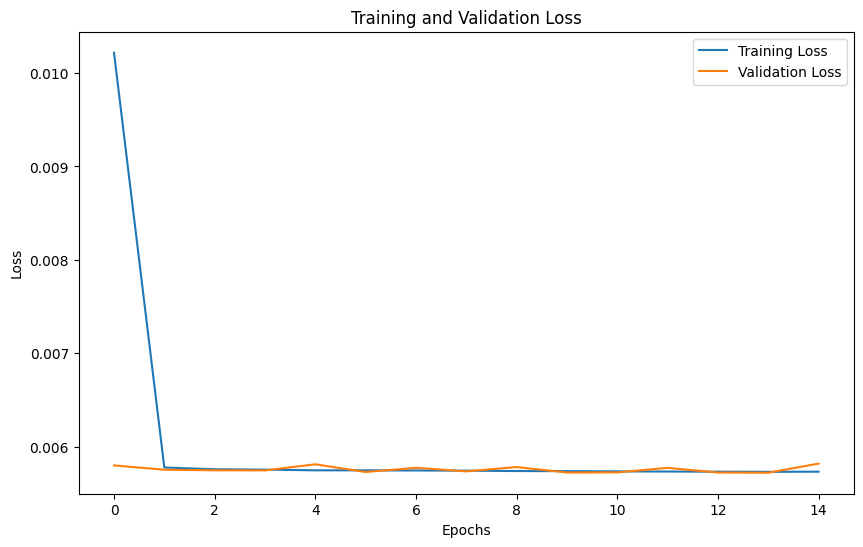

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()